## Ejercicio 1

Se dispone de los metales A, B, C y D de las cuales conocemos sus propiedades; y se desea **producir una aleación al menor costo posible** con un rango de valores para cada una de las propiedades. Esto resulta en la siguiente tabla:

|Propiedades    |A   |B   |C   |D   |Min |Máx |
|:-------------:|----|----|----|----|----|----|
|Densidad (DEN) |6500|5800|6200|5900|5950|6050|
|% Carbono (CAR)|0.2 |0.35|0.15|0.11|0.1 |0.3 |
|% Fósforo (FOS)|0.05|0.015|0.065|0.1|0.045|0.055| 


Las restricciones del problema se van a formular como:

> DEN: $5950 ≤ 6500.A + 5800.B + 6200.C + 5900.D ≤ 6050$

> CAR: $0,1 ≤ 0,2.A + 0,35.B + 0,15.C + 0,11.D ≤ 0,3$

> FOS: $0,045 ≤ 0,05.A + 0,015.B + 0,065.C + 0,1.D ≤ 0,055$


Y la función de costos, que será la de optimización, se plantea como:

> MIN: $Z = 2.A + 2,5.B + 1,5.C + 2.D$

In [3]:
# Importar la biblioteca PuLP
import pulp

# Crear el problema de maximización
prob = pulp.LpProblem('Minimizar costos', pulp.LpMinimize)

# Definir las variables de decisión
A= pulp.LpVariable('A', lowBound=0)
B= pulp.LpVariable('B', lowBound=0)
C= pulp.LpVariable('C', lowBound=0)
D= pulp.LpVariable('D', lowBound=0)

# Definir la función objetivo
prob += 2*A + 2.5*B + 1.5*C + 2*D

# Definir las restricciones
prob += 6500*A + 5800*B + 6200*C + 5900*D >= 5950
prob += 6500*A + 5800*B + 6200*C + 5900*D <= 6050
prob += 0.2*A + 0.35*B + 0.15*C + 0.11*D >= 0.1
prob += 0.2*A + 0.35*B + 0.15*C + 0.11*D <= 0.3
prob += 0.05*A + 0.015*B + 0.065*C + 0.1*D >= 0.045
prob += 0.05*A + 0.015*B + 0.065*C + 0.1*D <= 0.055

# Resolver el problema
prob.solve()

# Imprimir el resultado
print('Status:', pulp.LpStatus[prob.status])
print('Costos mínimos = $', round(pulp.value(prob.objective), 2))
print('Kilogramos de A =', round(pulp.value(A), 2))
print('Kilogramos de B =', round(pulp.value(B), 2))
print('Kilogramos de C =', round(pulp.value(C), 2))
print('Kilogramos de D =', round(pulp.value(D), 2))

Status: Optimal
Costos mínimos = $ 1.61
Kilogramos de A = 0.41
Kilogramos de B = 0.0
Kilogramos de C = 0.53
Kilogramos de D = 0.0


Por lo que finalmente obtenemos una aleación de A y C a un costo de $1.61



---



## Ejercicio 2

Se tienen tres licores de diferentes graduaciones A, B y C. Mezclando los tres, de acuerdo a sus fórmulas, se obtienen whiskies Escocés (E), Kilt (K) y Tartan (T). Es decir, que la composición de cada whisky se dara con la fórmula:

$I = Ai + Bi + Ci$

dado que I puede ser igual a E, K o T; y además:

$J = Je + Jk + Jt$

siendo J igual a A, B o C.

**Restricciones:**

> $Ae - 0,6.E ≥ 0$

> $Ce  -0,2.E ≤ 0$

> $Ak - 0,15.K ≥ 0$

> $Ck - 0,6.K ≤ 0$

> $Ct - 0,5.T ≤ 0$

> $Ae + Ak + At ≤ 2000$

> $Be + Bk + Bt ≤ 2500$

> $Ce + Ck + Ct ≤ 1200$

Por lo tanto resulto tener 15 variables, 4 por cada licor y 1 por cada whisky

Se desea definir la **composición de cada marca para maximizar el beneficio**, que dependerá de los precios de venta de los whiskies y los costos de los licores. Por lo tanto la ecuación resulta en:

> $MAX : Z = 6,80.E + 5,70.K + 4,50.T - 7.A - 5.B - 4.C$

In [ ]:
import pulp as pl

prob = pl.LpProblem('BeneficioMáximo', pl.LpMaximize)

# Variables decisión
AE = pl.LpVariable('AE', lowBound=0)
AK = pl.LpVariable('AK', lowBound=0)
AT = pl.LpVariable('AT', lowBound=0)
A = pl.LpVariable('A', lowBound=0)

BE = pl.LpVariable('BE', lowBound=0)
BK = pl.LpVariable('BK', lowBound=0)
BT = pl.LpVariable('BT', lowBound=0)
B = pl.LpVariable('B', lowBound=0)

CE = pl.LpVariable('CE', lowBound=0)
CK = pl.LpVariable('CK', lowBound=0)
CT = pl.LpVariable('CT', lowBound=0)
C = pl.LpVariable('C', lowBound=0)

E = pl.LpVariable('E', lowBound=0)
K = pl.LpVariable('K', lowBound=0)
T = pl.LpVariable('T', lowBound=0)

# Función objetivo
prob += 6.8*E + 5.7*K + 4.5*T - 7*A - 5*B - 4*C

# Restricciones
prob += AE - 0.6 * E >= 0
prob += CE - 0.2 * E <= 0
prob += AK - 0.15 * K >= 0
prob += CK - 0.6 * T <= 0
prob += CT - 0.5 * T <= 0
prob += AE + AK + AT - A == 0
prob += BE + BK + BT - B == 0
prob += CE + CK + CT - C == 0
prob += AE + BE + CE - E == 0
prob += AK + BK + CK - K == 0
prob += AT + BT + CT - T == 0
prob += A <= 2000
prob += B <= 2500
prob += C <= 1200

# Resolver el problema
prob.solve()

# Resultados
print('Beneficio =', round(pl.value(prob.objective), 0), '$')

if round(pl.value(E), 0):
  print('Se producirán', round(pl.value(E), 2), 
        'litros de Escocés compuesto por', round(pl.value(AE), 0), 
        'litros de A,', round(pl.value(BE), 0), 'litros de B y', 
        round(pl.value(CE), 0), 'litros de C')
else:
  print('No se producirá whisky Escocés')

if round(pl.value(K), 0) > 0.0:
  print('Se producirán', round(pl.value(K), 2), 'litros de Kilt compuesto por', 
        round(pl.value(AK), 0), 'litros de A,', round(pl.value(BK), 0), 
        'litros de B y', round(pl.value(CK), 0), 'litros de C')
else:
  print('No se producirá whisky Kilt')

if round(pl.value(T), 0):
  print('Se producirán', round(pl.value(T), 2), 
        'litros de Tartan compuesto por', round(pl.value(AT), 0), 
        'litros de A,', round(pl.value(BT), 0), 'litros de B y', 
        round(pl.value(CT), 0), 'litros de C')
else:
  print('No se producirá whisky Tartán')

Beneficio = 3495.0 $
Se producirán 2741.9 litros de Escocés compuesto por 1645.0 litros de A, 548.0 litros de B y 548.0 litros de C
Se producirán 2365.71 litros de Kilt compuesto por 355.0 litros de A, 1655.0 litros de B y 355.0 litros de C
Se producirán 592.38 litros de Tartan compuesto por 0.0 litros de A, 296.0 litros de B y 296.0 litros de C




---



## Ejercicio 3

Se tienen 7 tipos de píldoras compuestas, en diferentes proporciones, por las mismas 3 vitaminas

|   |P1|P2|P3|P4|P5|P6|P7|
|:-:|--|--|--|--|--|--|--|
|V1|5|0|2|0|3|1|2|
|V2|3|1|5|0|2|0|1|
|V3|1|0|3|1|2|0|6|
|$/u|4|1|5|0.6|3.5|0.7|4|

Se desea una combinación de píldoras que proporcionen al **menor costo posible** una cierta cantidad de unidades por vitamina:
- $V1 = 100$
- $V2 = 80$
- $120 ≤ V3 ≤ 160$

**Restricciones:**

> $5.P1 + 0.P2 + 2.P3 + 0.P4 + 3.P5 + 1.P6 + 2.P7 = 100$

> $3.P1 + 1.P2 + 5.P3 + 0.P4 + 2.P5 + 0.P6 + 1.P7 = 80$

> $1.P1 + 0.P2 + 3.P3 + 1.P4 + 2.P5 + 0.P6 + 6.P7 > 120$

> $1.P1 + 0.P2 + 3.P3 + 1.P4 + 2.P5 + 0.P6 + 6.P7 < 160$

**Función objetivo**

> MIN: $Z = 4.P1 + 1.P2 + 5.P3 + 0,6.P4 + 3,5.P5 + 0,7.P6 + 4.P7$



In [ ]:
import pulp as pl

prob = pl.LpProblem('CostoMínimo', pl.LpMinimize)

# Variables decisión
p1 = pl.LpVariable('P1', lowBound=0)
p2 = pl.LpVariable('P2', lowBound=0)
p3 = pl.LpVariable('P3', lowBound=0)
p4 = pl.LpVariable('P4', lowBound=0)
p5 = pl.LpVariable('P5', lowBound=0)
p6 = pl.LpVariable('P6', lowBound=0)
p7 = pl.LpVariable('P7', lowBound=0)

# Función objetivo
prob += 4*p1 + 1*p2 + 5*p3 + 0.6*p4 + 3.5*p5 + 0.7*p6 + 4*p7

# Restricciones
prob += 5*p1 + 2*p3 + 3*p5 + p6 + 2*p7 == 100
prob += 3*p1 + p2 + 5*p3 + 2*p5 + p7 == 80
prob += p1 + 3*p3 + p4 + 2*p5 + 6*p7 >= 120
prob += p1 + 3*p3 + p4 + 2*p5 + 6*p7 <= 160


# Resolver el problema
prob.solve()

# Imprimir resultados
print('Costo:', round(pl.value(prob.objective), 2), '$')
print('P1:', round(pl.value(p1), 2), 'unidades')
print('P2:', round(pl.value(p2), 2), 'unidades')
print('P3:', round(pl.value(p3), 2), 'unidades')
print('P4:', round(pl.value(p4), 2), 'unidades')
print('P5:', round(pl.value(p5), 2), 'unidades')
print('P6:', round(pl.value(p6), 2), 'unidades')
print('P7:', round(pl.value(p7), 2), 'unidades')

Costo: 136.7 $
P1: 11.56 unidades
P2: 0.0 unidades
P3: 6.06 unidades
P4: 0.0 unidades
P5: 0.0 unidades
P6: 0.0 unidades
P7: 15.05 unidades




---



## Ejercicio 4

Un taller de tejido de pullovers elabora 3 tipos de prendas (A, B y C), posee 2 máquinas para hacerlo (M1 y M2) y usa materia prima de dos calidad distintas (M y N).

El taller trabaja 2 turnos de 8 hs. de lunes a viernes; pero no es necesario que esa semana se terminen todos los pullovers que se empiezan. 

A final de semana se deben entregar 10 unidades de B sí o sí a un cliente.

|Prenda|M1 (h/u)|M2(h/u)|M(kg/u)|N(kg/u)|Beneficio ($/u)|
|:----:|--------|-------|-------|-------|---------------|
|**A**|5       |-      |1.6    | -     | 1000|
|**B**|6       |4      |-      |1.8    | 1500|
|**C**|-       |4      |1.2    |-      | 1800|
|**Disp. sem.**| 80|80|20|36||

Se busca **maximizar el beneficio**.

**Restricciones:**

> $5.A + 6.B1 ≤ 80$

> $4.B2 + 4.C ≤ 80$

> $1,6.A + 1,2.C ≤ 20$

> $10 ≤ B ≤ 36/1,6 = 20$

Tuve en cuenta que las unidades de B van a ser las que salgan de la máquina 1 (B1) y las de la 2 (B2)

**Función objetivo**

> MÁX: $Z = 1000.A + 1500.B + 1800.C$

In [ ]:
import pulp as pl

prob = pl.LpProblem('BeneficioMáximo', pl.LpMaximize)

# Variables decisión
a = pl.LpVariable('A', lowBound=0)
b = pl.LpVariable('B', lowBound=0)
b1 = pl.LpVariable('B1', lowBound=0)
b2 = pl.LpVariable('B2', lowBound=0)
c = pl.LpVariable('C', lowBound=0)

# Función objetivo
prob += 1000*a + 1500*b + 1800*c

# Restricciones
prob += 5*a + 6*b1 <= 80
prob += 4*b2 + 4*c <= 80
prob += 1.6*a + 1.2*c <= 20
prob += b - b1 - b2 == 0
prob += b >= 10
prob += b <= 20

# Resolver el problema
prob.solve()

# Imprimir resultados
print('Beneficio:', round(pl.value(prob.objective), 2), '$')
print('A:', round(pl.value(a), 2), 'unidades')
print('B:', round(pl.value(b), 2), 'unidades')
print('C:', round(pl.value(c), 2), 'unidades')

Beneficio: 55000.0 $
A: 0.0 unidades
B: 16.67 unidades
C: 16.67 unidades




---



## Ejercicio 5

Una fábrica automotriz produce sus propios tableros de tipo A, B, C y D. El proceso de fabricación es el siguiente: 

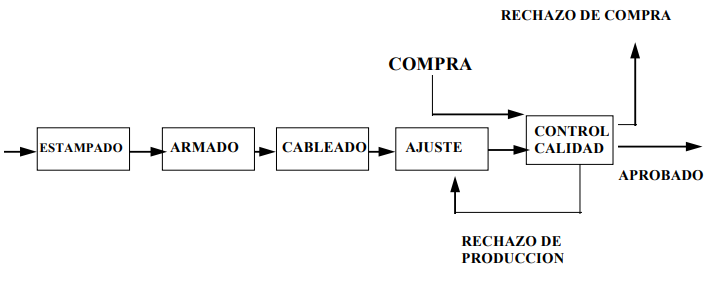

En la tabla siguiente se indican los tiempos del proceso en horas/unidad.

|Tablero|Estampado|Armado|Cableado|Ajuste|Calidad (P)|Calidad (C)|
|:-----:|---------|------|--------|------|-----------|-----------|
|**A**|0.05|0.10|0.20|0.08|0.02|0.03|
|**B**|0.05|0.12|0.25|0.10|0.03|0.05|
|**C**|0.05|0.14|0.30|0.06|0.03|0.04|
|**D**|0.05|0.18|0.25|0.10|0.03|0.04|
|**Disp.**|1200|3600|5000|3000|* |*|

(*) Calidad en total tiene 3000 hs. disponibles.

Un control estadístico de calidad indico que el 90% de los tableros producidos por la fábrica son aprobados y el resto vuelve a Ajuste; de los tableros comprados, el 80% se aprueba y el resto vuelve al proveedor. Para los reajustados la probabilidad de volver a Ajuste es la misma.  

Para cada tablero se detalla además:

|Tablero|Producción|Compra|Necesarias|
|:-----:|----------|------|--------|
|A|500|800|4000|
|B|600|750|3000|
|C|1200|1800|8000|
|D|1000|800|5000|

Se quiere **minimizar el costo** indicando la cantidad de unidades a producir y a comprar

**Restricciones:**

> $AP + AC = 4000$

> $BP + BC = 3000$

> $CP + CC = 8000$

> $DP + DC = 5000$

> EST: $AP + BP + CP + DP ≤ 1200/0,05 <= 24000$

> ARM: $0,1.AP + 0,12.BP + 0,14.CP + 0,18.DP ≤ 3600$

> CABL: $0,2.AP + 0,25.BP + 0,3.CP + 0,25.DP ≤ 5000$

> AJUS: $0,08.AP + 0,1.BP + 0,06.CP + 0,1.DP ≤ 3000/1,1 = 2727,273$

> CAL: $0,022.AP + 0,0375.AC + 0,033.BP + 0,0625.BC + 0,033.CP + 0,05.CC + 0,033.DP + 0,05.DC ≤ 3000$

En la última restricción, dividí los tiempos por unidad por 0,9 a las unidades producidas y por 0,8 a las compradas; esto es porque puede volver a pasar que del 10% reprocesado se vuelva a reprocesar el 10%.

**Función objetivo:**

> MIN: $Z = 500.AP + 800.AC + 600.BP + 750.BC + 1200.CP + 1800.CC + 1000.DP + 800.DC$



In [ ]:
import pulp as pl

prob = pl.LpProblem('CostoMínimo', pl.LpMinimize)

# Variables decisión
ap = pl.LpVariable('AP', lowBound=0)
ac = pl.LpVariable('AC', lowBound=0)
bp = pl.LpVariable('BP', lowBound=0)
bc = pl.LpVariable('BC', lowBound=0)
cp = pl.LpVariable('CP', lowBound=0)
cc = pl.LpVariable('CC', lowBound=0)
dp = pl.LpVariable('DP', lowBound=0)
dc = pl.LpVariable('DC', lowBound=0)


# Función objetivo
prob += 500*ap + 800*ac + 600*bp + 750*bc + 1200*cp + 1800*cc + 1000*dp + 800*dc

# Restricciones
prob += ap + ac == 4000
prob += bp + bc == 3000
prob += cp + cc == 8000
prob += dp + dc == 5000
prob += ap + bp + cp + dp <= 24000
prob += 0.1*ap + 0.12*bp + 0.14*cp + 0.18*dp <= 3600
prob += 0.2*ap + 0.25*bp + 0.3*cp + 0.25*dp <= 5000
prob += 0.08*ap + 0.1*bp + 0.06*cp + 0.1*dp <= 2727.273
prob += 0.022*ap + 0.033*bp + 0.033*cp + 0.033*dp + 0.0375*ac + 0.0625*bc + 0.05*cc + 0.05*dc <= 3000


# Resolver el problema
prob.solve()

# Imprimir resultados
print('Costo:', round(pl.value(prob.objective), 2), '$')
print('Tableros A:', round(pl.value(ap), 0), 'unidades producidas y', 
      round(pl.value(ac), 0), 'unidades compradas')
print('Tableros B:', round(pl.value(bp), 0), 'unidades producidas y', 
      round(pl.value(bc), 0), 'unidades compradas')
print('Tableros C:', round(pl.value(cp), 0), 'unidades producidas y', 
      round(pl.value(cc), 0), 'unidades compradas')
print('Tableros D:', round(pl.value(dp), 0), 'unidades producidas y', 
      round(pl.value(dc), 0), 'unidades compradas')

Costo: 17400000.0 $
Tableros A: 4000.0 unidades producidas y 0.0 unidades compradas
Tableros B: 3000.0 unidades producidas y 0.0 unidades compradas
Tableros C: 8000.0 unidades producidas y 0.0 unidades compradas
Tableros D: 0.0 unidades producidas y 5000.0 unidades compradas


---

## Ejercicio 6

Cuatro fábricas envían sus productos a cuatro almacenes. 

**Tabla 1:** capacidad (en tn) y costos de producción de cada fábrica
|Fábrica|Capacidad|Costo ($/u)|
|:-----:|:-------:|:---------:|
|1      |140      |60         |
|2      |260      |72         |
|3      |360      |48         |
|4      |220      |60         |

**Tabla 2:** costos de transporte ($/u) de cada fábrica a cada almacén y requerimientos (en tn)
|Fábrica|Alm. A|Alm. B|Alm. C|Alm. D|
|:-----:|:----:|:----:|:----:|:----:|
|1      |28    |40    |36    |38    |
|2      |18    |28    |24    |30    |
|3      |42    |54    |52    |54    |
|4      |36    |48    |40    |46    |
|Requerimientos|180|280|150|200|

Se desea establecer un programa de distribución que **minimice el costo total.**

Defino de las variables siendo **i = 1,2,3,4** y **j = A,B,C,D**
* $F_i$ = "Cantidad de unidades a producir en la fábrica i"
* $x_{ij}$ = "Cantidad de unidades a transportar desde la fábrica i hasta el almacén j"
* $A_j$ = "Cantidad de unidades a entregar al almacén j"

In [2]:
import pulp as pl

prob = pl.LpProblem('CostoMínimo', pl.LpMinimize)


# Variables decisión
f1 = pl.LpVariable('F1', lowBound=0)
f2 = pl.LpVariable('F2', lowBound=0)
f3 = pl.LpVariable('F3', lowBound=0)
f4 = pl.LpVariable('F4', lowBound=0)

x1a = pl.LpVariable('x1a', lowBound=0)
x1b = pl.LpVariable('x1b', lowBound=0)
x1c = pl.LpVariable('x1c', lowBound=0)
x1d = pl.LpVariable('x1d', lowBound=0)
x2a = pl.LpVariable('x2a', lowBound=0)
x2b = pl.LpVariable('x2b', lowBound=0)
x2c = pl.LpVariable('x2c', lowBound=0)
x2d = pl.LpVariable('x2d', lowBound=0)
x3a = pl.LpVariable('x3a', lowBound=0)
x3b = pl.LpVariable('x3b', lowBound=0)
x3c = pl.LpVariable('x3c', lowBound=0)
x3d = pl.LpVariable('x3d', lowBound=0)
x4a = pl.LpVariable('x4a', lowBound=0)
x4b = pl.LpVariable('x4b', lowBound=0)
x4c = pl.LpVariable('x4c', lowBound=0)
x4d = pl.LpVariable('x4d', lowBound=0)

aa = pl.LpVariable('Aa', lowBound=0)
ab = pl.LpVariable('Ab', lowBound=0)
ac = pl.LpVariable('Ac', lowBound=0)
ad = pl.LpVariable('Ad', lowBound=0)


# Función objetivo
prob += 60*f1+72*f2+48*f3+60*f4+28*x1a+40*x1b+36*x1c+28*x1d+18*x2a+28*x2b+24*x2c+30*x2d+42*x3a+54*x3b+52*x3c+54*x3d+36*x4a+48*x4b+40*x4c+46*x4d


# Restricciones
## Balance de fábricas
prob += x1a + x1b + x1c + x1d - f1 == 0
prob += x2a + x2b + x2c + x2d - f2 == 0
prob += x3a + x3b + x3c + x3d - f3 == 0
prob += x4a + x4b + x4c + x4d - f4 == 0

## Capacidad de fábricas
prob += f1 <= 140
prob += f2 <= 260
prob += f3 <= 360
prob += f4 <= 220

## Balance de almacenes
prob += x1a + x2a + x3a + x4a - aa == 0
prob += x1b + x2b + x3b + x4b - ab == 0
prob += x1c + x2c + x3c + x4c - ac == 0
prob += x1d + x2d + x3d + x4d - ad == 0

## Requerimientos de almacenes
prob += aa == 180
prob += ab == 280
prob += ac == 150
prob += ad == 200


# Resolver el problema
prob.solve()

#Resultados
print('Costo:', round(pl.value(prob.objective), 2), '$')
print('Fábrica 1: producirá', pl.value(f1), 'unidades y le entregará', pl.value(x1a), 'unidades al almacén A,',
    pl.value(x1b), 'al B,', pl.value(x1c), 'al C y', pl.value(x1d), 'al D.')
print('Fábrica 2: producirá', pl.value(f2), 'unidades y le entregará', pl.value(x2a), 'unidades al almacén A,',
    pl.value(x2b), 'al B,', pl.value(x2c), 'al C y', pl.value(x2d), 'al D.')
print('Fábrica 3: producirá', pl.value(f3), 'unidades y le entregará', pl.value(x3a), 'unidades al almacén A,',
    pl.value(x3b), 'al B,', pl.value(x3c), 'al C y', pl.value(x3d), 'al D.')
print('Fábrica 4: producirá', pl.value(f4), 'unidades y le entregará', pl.value(x4a), 'unidades al almacén A,',
    pl.value(x4b), 'al B,', pl.value(x4c), 'al C y', pl.value(x4d), 'al D.')


Costo: 77480.0 $
Fábrica 1: producirá 140.0 unidades y le entregará 0.0 unidades al almacén A, 0.0 al B, 0.0 al C y 140.0 al D.
Fábrica 2: producirá 260.0 unidades y le entregará 0.0 unidades al almacén A, 160.0 al B, 100.0 al C y 0.0 al D.
Fábrica 3: producirá 360.0 unidades y le entregará 180.0 unidades al almacén A, 120.0 al B, 0.0 al C y 60.0 al D.
Fábrica 4: producirá 50.0 unidades y le entregará 0.0 unidades al almacén A, 0.0 al B, 50.0 al C y 0.0 al D.


---

## Ejercicio 9

Un avión tiene tres compartimientos para almacenar, los cuales pueden completarse hasta su capacidad límite pero el peso de la carga en los respectivos compartimientos debe ser proporcional a su capacidad.

**Tabla 1:** capacidad de los compartimientos

|Compartimiento|Peso (tn)|Espacio ($pies^3$)|
|:------------:|:-------:|:----------------:|
| Delantero (D)| 12      | 7000             |
| Central (C)  | 18      | 9000             |
| Trasero (T)  | 10      | 5000             |

**Tabla 2:** ofertas para 4 tipos de cargas por espacio de sobra

|Carga|Peso (tn)|Volumen (${pies^3}/tn$)|Ganancia ($/tn)|
|:---:|:-------:|:---------------------:|:-------------:|
|1|20|500|320|
|2|16|700|400|
|3|25|600|360|
|4|13|400|290|

Se puede aceptar cualquier fracción de estas cargas. Se quiere determinar qué cantidad de cada carga debe aceptarse y cómo distriburla en los compartimientos para **maximizar la ganancia** del vuelo. 

Defino las variables del modelo siendo **i = 1,2,3,4** y **j = D,C,T**

* $P_j$ = Peso almacenado en el compartimiento j
* $P_i$ = Peso de la carga tipo i
* $P_{ij}$ = Peso de la carga i almacenada en el compartimiento j
* $V_j$ = Volumen almacenado en el compartimiento j
* $V_{ij}$ = Volumen de la carga i almacenada en el compartimiento j

In [6]:
import pulp as pl

prob = pl.LpProblem('BeneficioMáximo', pl.LpMaximize)


# Variables decisión
p = pl.LpVariable('P', lowBound=0)
pd = pl.LpVariable('PD', lowBound=0)
pc = pl.LpVariable('PC', lowBound=0)
pt = pl.LpVariable('PT', lowBound=0)

p1 = pl.LpVariable('P1', lowBound=0)
p2 = pl.LpVariable('P2', lowBound=0)
p3 = pl.LpVariable('P3', lowBound=0)
p4 = pl.LpVariable('P4', lowBound=0)

p1d = pl.LpVariable('P1D', lowBound=0)
p1c = pl.LpVariable('P1C', lowBound=0)
p1t = pl.LpVariable('P1T', lowBound=0)
p2d = pl.LpVariable('P2D', lowBound=0)
p2c = pl.LpVariable('P2C', lowBound=0)
p2t = pl.LpVariable('P2T', lowBound=0)
p3d = pl.LpVariable('P3D', lowBound=0)
p3c = pl.LpVariable('P3C', lowBound=0)
p3t = pl.LpVariable('P3T', lowBound=0)
p4d = pl.LpVariable('P4D', lowBound=0)
p4c = pl.LpVariable('P4C', lowBound=0)
p4t = pl.LpVariable('P4T', lowBound=0)

vc = pl.LpVariable('V1', lowBound=0)
vd = pl.LpVariable('V2', lowBound=0)
vt = pl.LpVariable('V3', lowBound=0)


# Función objetivo
prob += 320*p1 + 400*p2 + 360*p3 + 290*p4


# Restricciones
## Capacidad de peso por cargamento
prob += p1 <= 20
prob += p2 <= 16
prob += p3 <= 25
prob += p4 <= 13

## Balanceo cargamentos
prob += p1d + p1c + p1t - p1 == 0
prob += p2d + p2c + p2t - p2 == 0
prob += p3d + p3c + p3t - p3 == 0
prob += p4d + p4c + p4t - p4 == 0

## Capacidad de peso por compartimiento
prob += pd <= 12
prob += pc <= 18
prob += pt <= 10

## Balanceo peso de compartimientos
prob += p1d + p2d + p3d + p4d - pd == 0
prob += p1c + p2c + p3c + p4c - pc == 0
prob += p1t + p2t + p3t + p4t - pt == 0

## Capacidad de volumen por compartimiento
prob += vd <= 7000
prob += vc <= 9000
prob += vt <= 5000

## Balanceo volumen de compartimientos
prob += 500*p1d + 700*p2d + 600*p3d + 400*p4d - vd == 0
prob += 500*p1c + 700*p2c + 600*p3c + 400*p4c - vc == 0
prob += 500*p1t + 700*p2t + 600*p3t + 400*p4t - vt == 0

## Balanceo peso total
prob += pd + pc + pt - p == 0


# Resolver el problema
prob.solve()

# Resultados
print('Ganancia:', round(pl.value(prob.objective), 2), '$')
print('Carga 1:', pl.value(p1), 'tn')
print('Se enviarán', pl.value(p1c), 'tn al Central,', pl.value(p1t), 'tn al Trasero y', pl.value(p1d), 'tn al Delantero')
print('Carga 2:', pl.value(p2), 'tn')
print('Se enviarán', round(pl.value(p2c), 1), 'tn al Central,', round(pl.value(p2t), 1), 'tn al Trasero y', pl.value(p2d), 'tn al Delantero')
print('Carga 3:', pl.value(p3), 'tn')
print('Carga 4:', pl.value(p4), 'tn')
print('Se enviarán', round(pl.value(p4c), 1), 'tn al Central,', round(pl.value(p4t), 1), 'tn al Trasero y', pl.value(p4d), 'tn al Delantero')
print('Compartimiento delantero:', pl.value(pd), 'tn')
print('Compartimiento central:', pl.value(pc), 'tn')
print('Compartimiento trasero:', pl.value(pt), 'tn')

Ganancia: 13330.0 $
Carga 1: 15.5 tn
Se enviarán 8.5 tn al Central, 0.0 tn al Trasero y 7.0 tn al Delantero
Carga 2: 11.5 tn
Se enviarán 3.2 tn al Central, 3.3 tn al Trasero y 5.0 tn al Delantero
Carga 3: 0.0 tn
Carga 4: 13.0 tn
Se enviarán 6.3 tn al Central, 6.7 tn al Trasero y 0.0 tn al Delantero
Compartimiento delantero: 12.0 tn
Compartimiento central: 18.0 tn
Compartimiento trasero: 10.0 tn
